In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [58]:
# data load
ads_df = pd.read_csv('ads.csv')
campaigns_df = pd.read_csv('campaigns.csv')
users_df = pd.read_csv('users.csv')
events_df = pd.read_csv('ad_events.csv')

In [59]:
# Quick overview
print("Ads shape:", ads_df.shape)
print("Campaigns shape:", campaigns_df.shape)
print("Users shape:", users_df.shape)
print("Events shape:", events_df.shape)

Ads shape: (200, 7)
Campaigns shape: (50, 6)
Users shape: (9841, 7)
Events shape: (400000, 7)


In [60]:
# Display first rows
display(ads_df.head())
display(campaigns_df.head())
display(users_df.head())
display(events_df.head())

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,25-05-2025,23-07-2025,59,24021.32
1,2,Campaign_2_Launch,16-04-2025,07-07-2025,82,79342.41
2,3,Campaign_3_Winter,04-05-2025,29-06-2025,56,14343.25
3,4,Campaign_4_Summer,04-06-2025,08-08-2025,65,45326.60
4,5,Campaign_5_Launch,11-07-2025,28-08-2025,48,68376.69


,user_id,user_gender,user_age,age_group,country,location,interests
0,1.20E+01,Male,56,55-65,Japan,New Jeremy,"lifestyle, health"
1,5.00E+01,Female,17,16-17,Canada,Lake Juanville,"food, finance"
2,62,Female,16,16-17,France,Davidside,"photography, art, food"
3,67,Male,38,35-44,United States,East Gary,"travel, gaming, art"
4,7.00E+01,Male,23,18-24,United States,Audreyton,"photography, food"


,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression


In [61]:
#Fixing date columns in campaigns (convert to datetime)
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'], format='%d-%m-%Y')
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'], format='%d-%m-%Y')

In [62]:
# Parsing timestamp in events to datetime
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'])
events_df['date'] = events_df['timestamp'].dt.date 
# Adding date column for grouping

In [63]:
# Handle user_id in users (fix scientific notation if present)
users_df['user_id'] = users_df['user_id'].astype(str).str.replace('.', '', regex=False)

In [64]:
# Check for NaNs
print("NaNs in Ads:", ads_df.isnull().sum())
print("NaNs in Campaigns:", campaigns_df.isnull().sum())
print("NaNs in Users:", users_df.isnull().sum())
print("NaNs in Events:", events_df.isnull().sum())

NaNs in Ads: ad_id               0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
dtype: int64
NaNs in Campaigns: campaign_id      0
name             0
start_date       0
end_date         0
duration_days    0
total_budget     0
dtype: int64
NaNs in Users: user_id        0
user_gender    0
user_age       0
age_group      0
country        0
location       0
interests      0
dtype: int64
NaNs in Events: event_id       0
ad_id          0
user_id        0
timestamp      0
day_of_week    0
time_of_day    0
event_type     0
date           0
dtype: int64


In [65]:
# Basic stats
print("\nEvent types distribution:\n", events_df['event_type'].value_counts())


Event types distribution:
 event_type
Impression    339812
Click          40079
Like           12013
Comment         4108
Purchase        2031
Share           1957
Name: count, dtype: int64


Text(0, 0.5, 'Count')

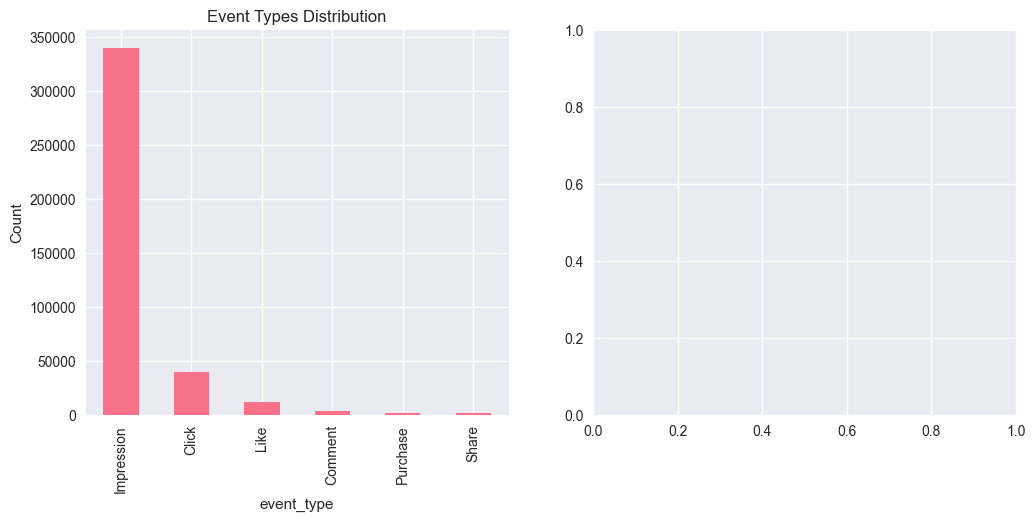

In [66]:
# Plot event types
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
events_df['event_type'].value_counts().plot(kind='bar', ax=axes[0], title='Event Types Distribution')
axes[0].set_ylabel('Count')

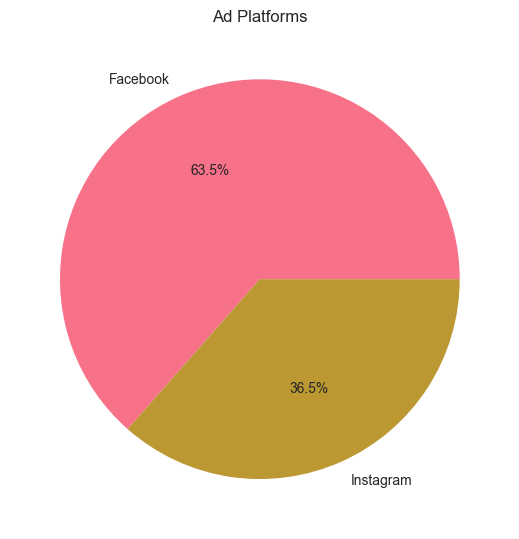

In [67]:
ads_df['ad_platform'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Ad Platforms'
)
plt.ylabel('')  
plt.tight_layout()
plt.show()


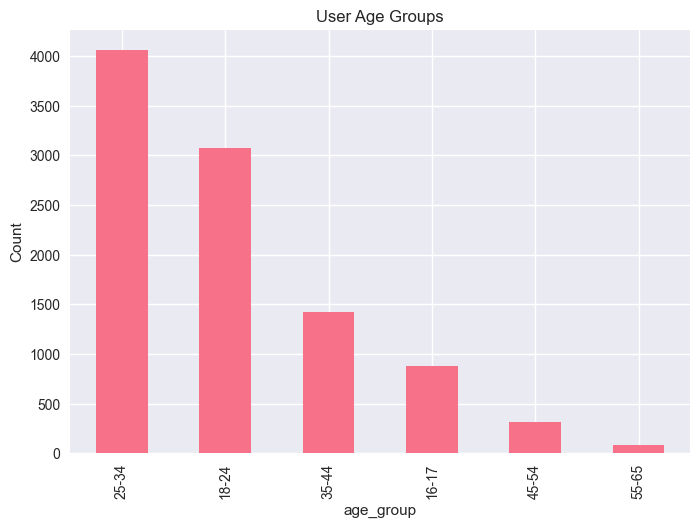

In [68]:
# User age groups
users_df['age_group'].value_counts().plot(kind='bar', title='User Age Groups')
plt.ylabel('Count')
plt.show()

In [69]:
#Merge Datasets
ad_campaigns_df = pd.merge(ads_df, campaigns_df, on='campaign_id', how='left')
merged_events = pd.merge(events_df, ad_campaigns_df, on='ad_id', how='left')
full_df = pd.merge(merged_events, users_df, on='user_id', how='left')
print("Merged shape:", full_df.shape)
#display(full_df.info())
#print("\nColumns:", full_df.columns.tolist()

Merged shape: (400000, 25)


In [70]:
#Key Performance Metrics Calculation
# Pivot events for metrics
event_pivot = full_df.pivot_table(index='ad_id', 
                                  columns='event_type', 
                                  values='event_id', 
                                  aggfunc='count', 
                                  fill_value=0).reset_index()

In [71]:
# Rename columns for clarity
event_pivot.columns = ['ad_id', 'Clicks', 'Impressions', 'Likes', 'Purchases', 'Shares','Comments']

In [72]:
# Merge back with ads for context
metrics_df = pd.merge(event_pivot, ads_df, on='ad_id')

In [73]:
# Calculate rates
metrics_df['CTR'] = (metrics_df['Clicks'] / metrics_df['Impressions']) * 100
metrics_df['Engagement_Rate'] = ((metrics_df['Likes'] + metrics_df['Shares']) / metrics_df['Impressions']) * 100
metrics_df['Conversion_Rate'] = (metrics_df['Purchases'] / metrics_df['Clicks']) * 100

In [74]:
# Fill NaNs (e.g., divide by zero)
metrics_df.fillna(0, inplace=True)

In [75]:
display(metrics_df.head())
print("Top 5 CTR Ads:\n", metrics_df.nlargest(5, 'CTR')[['ad_id', 'CTR', 'ad_platform', 'ad_type']])

,ad_id,Clicks,Impressions,Likes,Purchases,Shares,Comments,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests,CTR,Engagement_Rate,Conversion_Rate
0,1,212,25,1743,56,8,8,28,Facebook,Video,Female,35-44,"art, technology",848.000000,7004.000000,26.415094
1,2,205,23,1751,56,13,10,33,Facebook,Stories,All,25-34,"travel, photography",891.304348,7669.565217,27.317073
2,3,225,27,1655,68,13,8,20,Instagram,Carousel,All,25-34,technology,833.333333,6177.777778,30.222222
3,4,198,30,1737,56,12,10,28,Facebook,Stories,Female,25-34,news,660.000000,5830.000000,28.282828
4,5,211,22,1693,60,11,8,24,Instagram,Image,Female,25-34,news,959.090909,7745.454545,28.436019


Top 5 CTR Ads:
      ad_id          CTR ad_platform   ad_type
104    105  1741.666667   Instagram     Image
110    111  1741.666667    Facebook   Stories
80      81  1653.846154   Instagram  Carousel
38      39  1616.666667   Instagram   Stories
81      82  1576.923077    Facebook   Stories


In [76]:
campaign_metrics = metrics_df.groupby('campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Likes': 'sum',
    'Shares': 'sum',
    'Purchases': 'sum'
}).reset_index()


In [77]:
campaign_metrics = campaign_metrics.merge(
    campaigns_df[['campaign_id', 'total_budget', 'name']],
    on='campaign_id',
    how='left'
)


In [78]:
campaign_metrics['CTR'] = (
    campaign_metrics['Clicks'] / campaign_metrics['Impressions'] * 100
)

campaign_metrics['Total_Engagements'] = (
    campaign_metrics['Likes'] + campaign_metrics['Shares']
)

campaign_metrics['Engagement_Rate'] = (
    campaign_metrics['Total_Engagements'] / campaign_metrics['Impressions'] * 100
)

campaign_metrics['Conversion_Rate'] = (
    campaign_metrics['Purchases'] / campaign_metrics['Clicks'] * 100
)

campaign_metrics['CPI'] = (
    campaign_metrics['total_budget'] / campaign_metrics['Impressions']
)


In [79]:
display(campaign_metrics.head())

print(
    "Campaign with Highest CTR:\n",
    campaign_metrics.nlargest(1, 'CTR')[['name', 'CTR']]
)


,campaign_id,Impressions,Clicks,Likes,Shares,Purchases,total_budget,name,CTR,Total_Engagements,Engagement_Rate,Conversion_Rate,CPI
0,1,50,578,5045,33,188,24021.32,Campaign_1_Launch,1156.000000,5078,10156.000000,32.525952,480.426400
1,2,64,599,5255,31,172,79342.41,Campaign_2_Launch,935.937500,5286,8259.375000,28.714524,1239.725156
2,3,79,783,6711,41,240,14343.25,Campaign_3_Winter,991.139241,6752,8546.835443,30.651341,181.560127
3,4,121,1178,10249,49,356,45326.60,Campaign_4_Summer,973.553719,10298,8510.743802,30.220713,374.600000
4,5,69,583,5101,34,218,68376.69,Campaign_5_Launch,844.927536,5135,7442.028986,37.392796,990.966522


Campaign with Highest CTR:
                   name          CTR
47  Campaign_50_Summer  1376.923077


In [80]:
# Function to check interest match (simple string overlap)
def interest_match(ad_interests, user_interests):
    if pd.isna(ad_interests) or pd.isna(user_interests):
        return 0
    ad_set = set(ad_interests.lower().split(', '))
    user_set = set(user_interests.lower().split(', '))
    return len(ad_set.intersection(user_set)) / len(ad_set) if ad_set else 0

# Apply to full_df (sample if too large: full_df.sample(10000))
full_df['interest_overlap'] = full_df.apply(lambda row: interest_match(row['target_interests'], row['interests']), axis=1)

# Gender and age match
full_df['gender_match'] = (full_df['target_gender'].str.lower() == full_df['user_gender'].str.lower()) | (full_df['target_gender'] == 'All')
full_df['age_match'] = full_df['target_age_group'] == full_df['age_group']

# Aggregate matches by ad
targeting_df = full_df.groupby('ad_id').agg({
    'interest_overlap': 'mean',
    'gender_match': 'mean',
    'age_match': 'mean',
    'event_type': lambda x: (x == 'Purchase').sum()  # Purchases as success metric
}).reset_index()
targeting_df.columns = ['ad_id', 'Avg_Interest_Overlap', 'Gender_Match_Rate', 'Age_Match_Rate', 'Purchases']

display(targeting_df.head())
print("Ads with Highest Interest Overlap:\n", targeting_df.nlargest(5, 'Avg_Interest_Overlap'))

,ad_id,Avg_Interest_Overlap,Gender_Match_Rate,Age_Match_Rate,Purchases
0,1,0.149123,0.321637,0.134503,8
1,2,0.134597,1.000000,0.420797,13
2,3,0.155311,1.000000,0.385772,13
3,4,0.141948,0.318649,0.392560,12
4,5,0.160100,0.327681,0.394015,11


Ads with Highest Interest Overlap:
      ad_id  Avg_Interest_Overlap  Gender_Match_Rate  Age_Match_Rate  Purchases
23      24              0.169870           0.333506        0.000000         13
22      23              0.163071           1.000000        0.296036          9
66      67              0.162773           1.000000        0.295726         12
140    141              0.162402           0.529035        0.140256          9
134    135              0.161590           0.522457        0.290139          8


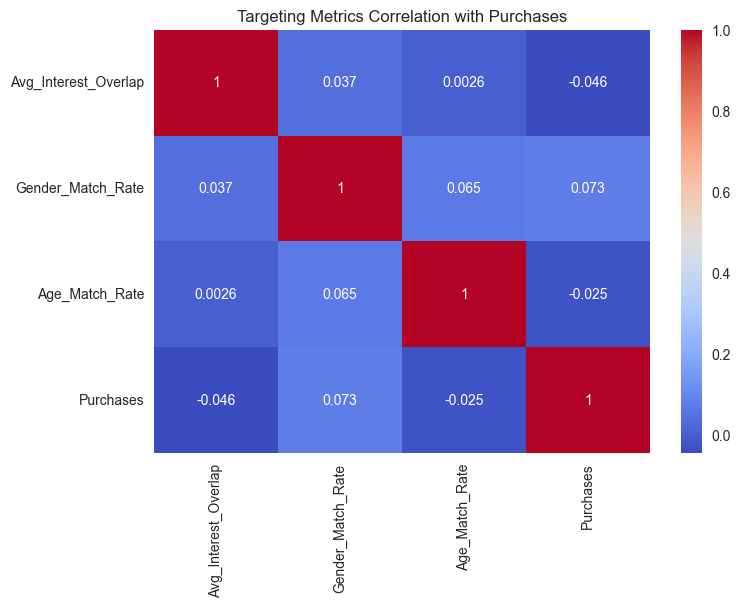

In [81]:
# Heatmap of targeting vs. performance
corr_df = targeting_df[['Avg_Interest_Overlap', 'Gender_Match_Rate', 'Age_Match_Rate', 'Purchases']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Targeting Metrics Correlation with Purchases')
plt.show()

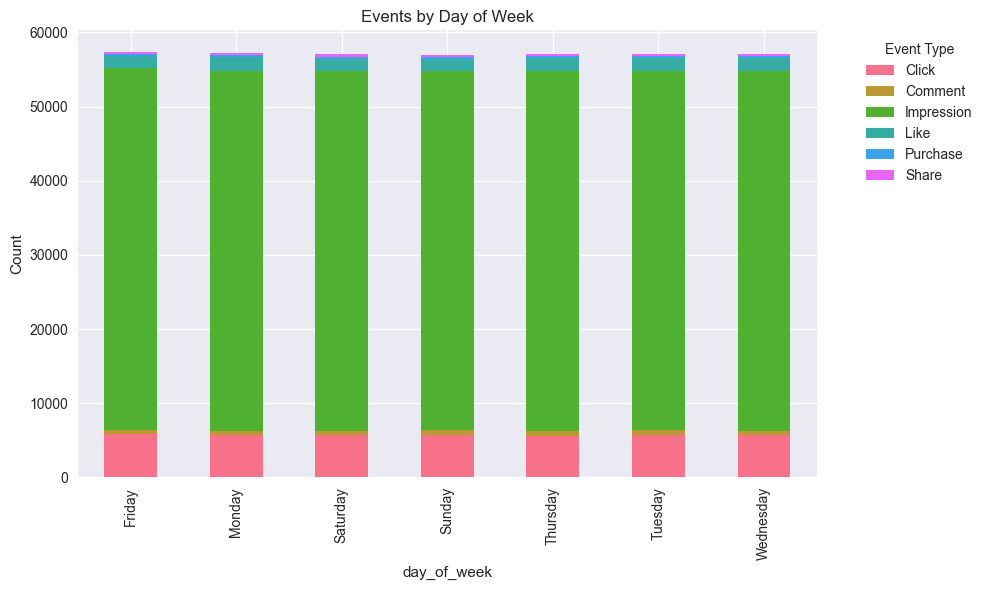

In [82]:
# By day of week
day_metrics = full_df.groupby('day_of_week')['event_type'].value_counts().unstack(fill_value=0)
day_metrics.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Events by Day of Week')
plt.ylabel('Count')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

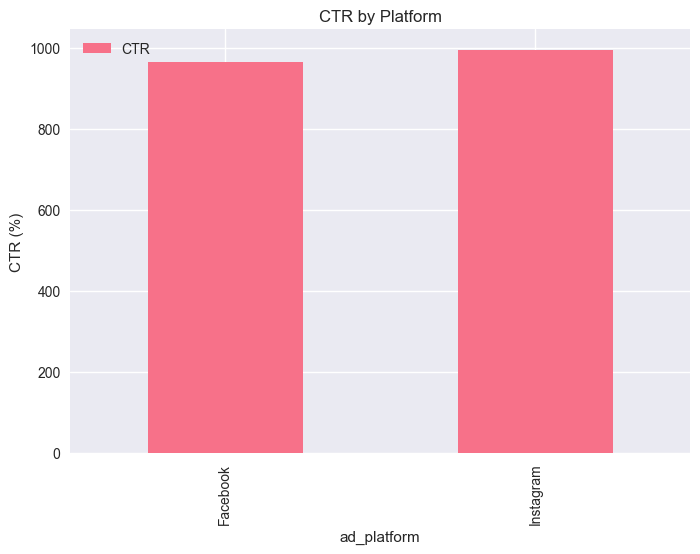

In [83]:
# By platform and event
platform_metrics = metrics_df.groupby('ad_platform').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum'
}).reset_index()
platform_metrics['CTR'] = (platform_metrics['Clicks'] / platform_metrics['Impressions']) * 100

platform_metrics.plot(x='ad_platform', y='CTR', kind='bar', title='CTR by Platform')
plt.ylabel('CTR (%)')
plt.show

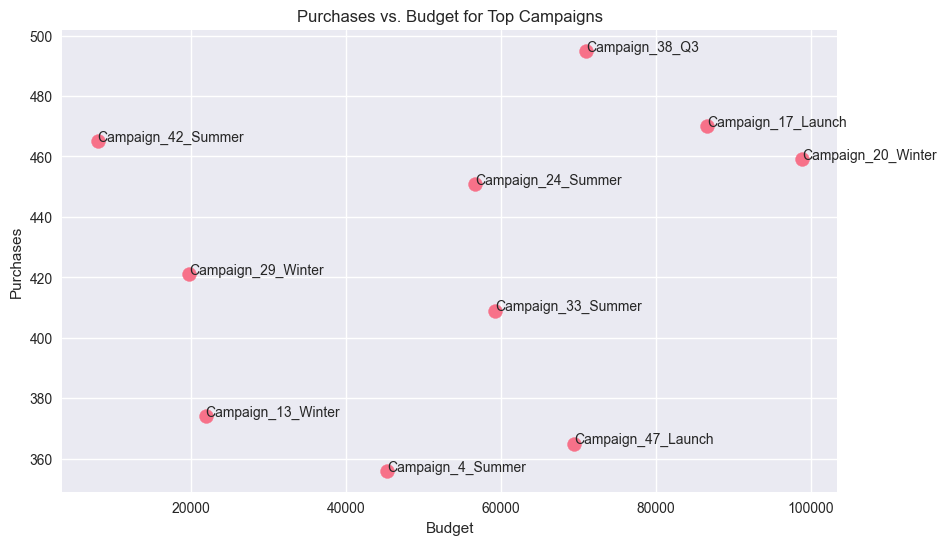

In [84]:
# Top campaigns by Purchases vs. Budget
top_campaigns = campaign_metrics.nlargest(10, 'Purchases')[['name', 'Purchases', 'total_budget']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(top_campaigns['total_budget'], top_campaigns['Purchases'], s=100)
for i, txt in enumerate(top_campaigns['name']):
    ax.annotate(txt, (top_campaigns['total_budget'].iloc[i], top_campaigns['Purchases'].iloc[i]))
ax.set_xlabel('Budget')
ax.set_ylabel('Purchases')
plt.title('Purchases vs. Budget for Top Campaigns')
plt.show()

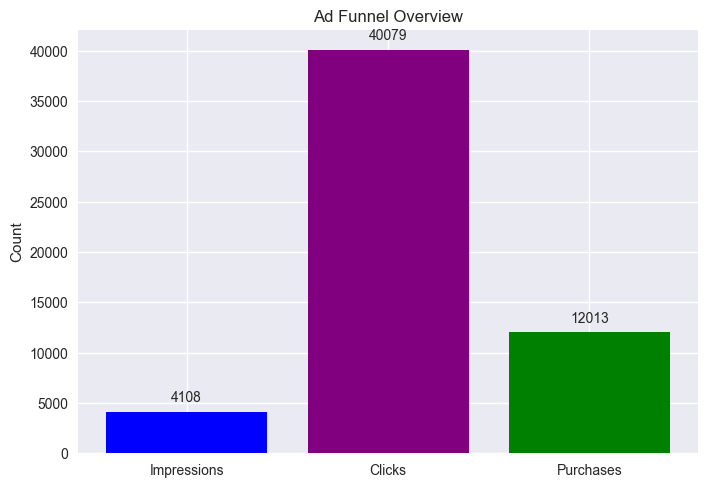

In [85]:
# Funnel visualization (Impressions -> Clicks -> Purchases)
funnel_data = metrics_df[['Impressions', 'Clicks', 'Purchases']].sum()
plt.bar(['Impressions', 'Clicks', 'Purchases'], funnel_data.values, color=['blue', 'purple', 'green'])
plt.title('Ad Funnel Overview')
plt.ylabel('Count')
for i, v in enumerate(funnel_data.values):
    plt.text(i, v + 1000, str(v), ha='center')
plt.show()

In [86]:
# Save key outputs
metrics_df.to_csv('ad_metrics.csv', index=False)
campaign_metrics.to_csv('campaign_metrics.csv', index=False)
print("Files exported successfully!")

Files exported successfully!


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Sample data if too large
df_model = full_df.sample(frac=0.05, random_state=42).copy()

In [89]:
# Create target: 1 if event_type == 'Purchase'
df_model['is_purchase'] = (df_model['event_type'] == 'Purchase').astype(int)

In [90]:
# Features (encode categoricals)
features = ['user_age', 'gender_match', 'age_match', 'interest_overlap', 'ad_platform', 'ad_type']
df_model = df_model.dropna(subset=features + ['is_purchase'])

le_platform = LabelEncoder()
le_type = LabelEncoder()
df_model['ad_platform_enc'] = le_platform.fit_transform(df_model['ad_platform'])
df_model['ad_type_enc'] = le_type.fit_transform(df_model['ad_type'])

X = df_model[['user_age', 'gender_match', 'age_match', 'interest_overlap', 'ad_platform_enc', 'ad_type_enc']]
y = df_model['is_purchase']

In [91]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Metrics
auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Coefficients:\n", coef_df.sort_values('Coefficient', key=abs, ascending=False))

ROC-AUC: 0.5514

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3804
           1       0.00      0.00      0.00        16

    accuracy                           1.00      3820
   macro avg       0.50      0.50      0.50      3820
weighted avg       0.99      1.00      0.99      3820


Feature Coefficients:
             Feature  Coefficient
3  interest_overlap    -0.386699
4   ad_platform_enc    -0.247999
5       ad_type_enc    -0.161181
1      gender_match    -0.037103
2         age_match     0.017917
0          user_age     0.016643


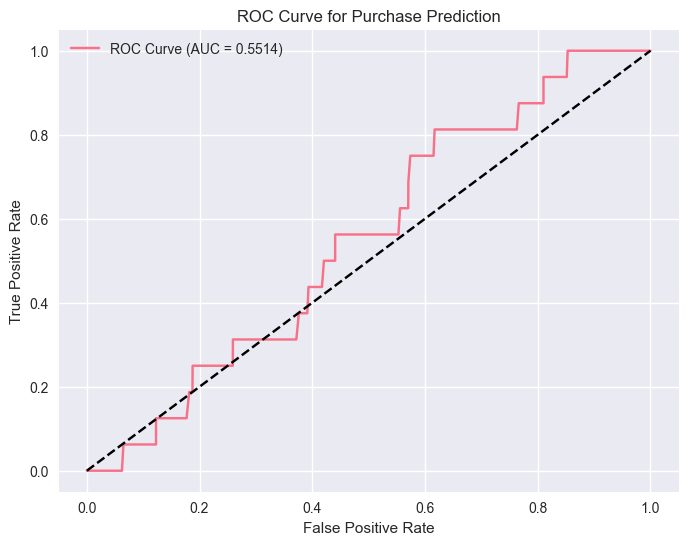

In [93]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Purchase Prediction')
plt.legend()
plt.show()

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [95]:
user_agg = full_df.groupby('user_id').agg(
    Purchases=('event_type', lambda x: (x == 'Purchase').sum()),
    Clicks=('event_type', lambda x: (x == 'Click').sum()),
    user_age=('user_age', 'first'),
    interest_overlap=('interest_overlap', 'mean')
).reset_index()


In [96]:
features_user = ['user_age', 'Purchases', 'Clicks', 'interest_overlap']


In [100]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='median')

user_imputed = imputer.fit_transform(
    user_agg[features_user]
)

user_scaled = StandardScaler().fit_transform(user_imputed)

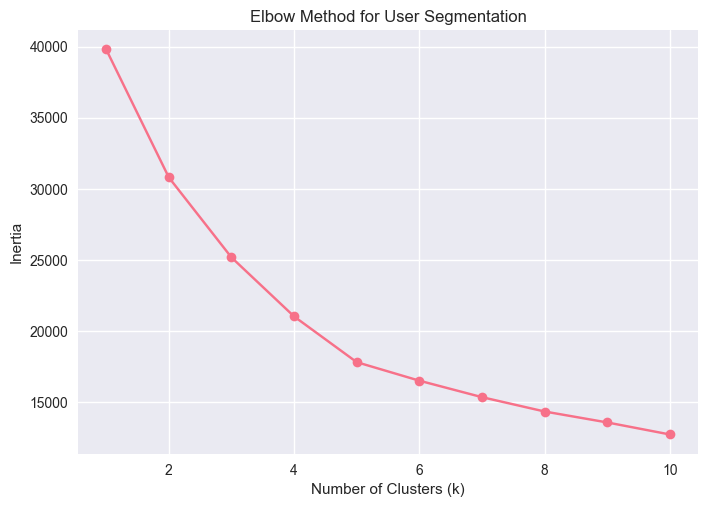

In [101]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(user_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for User Segmentation')
plt.show()


In [102]:
# Cluster (k=3)
kmeans_user = KMeans(n_clusters=3, random_state=42, n_init=10)
user_agg['cluster'] = kmeans_user.fit_predict(user_scaled)

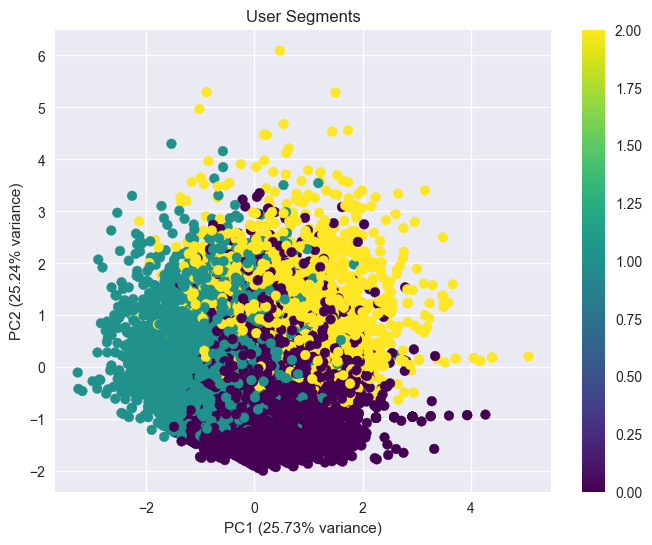

Cluster Profiles:
           user_age  Purchases    Clicks  interest_overlap
cluster                                                  
0        27.928229   0.000000  4.095815          0.083669
1        27.202404   0.000559  3.910819          0.228096
2        27.799087   1.106929  4.088925          0.145560


In [103]:
# PCA for viz
pca = PCA(n_components=2)
user_pca = pca.fit_transform(user_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(user_pca[:, 0], user_pca[:, 1], c=user_agg['cluster'], cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('User Segments')
plt.colorbar(scatter)
plt.show()
print("Cluster Profiles:\n", user_agg.groupby('cluster')[features_user].mean())

In [104]:
# Similar for campaigns (using campaign_metrics)
features_camp = ['total_budget', 'Purchases', 'CTR', 'CPI']
camp_scaled = StandardScaler().fit_transform(campaign_metrics[features_camp])

kmeans_camp = KMeans(n_clusters=3, random_state=42, n_init=10)
campaign_metrics['cluster'] = kmeans_camp.fit_predict(camp_scaled)

print("Campaign Cluster Profiles:\n", campaign_metrics.groupby('cluster')[['name'] + features_camp].agg({'name': 'count', **{f: 'mean' for f in features_camp}}))

Campaign Cluster Profiles:
          name  total_budget   Purchases          CTR          CPI
cluster                                                          
0          22  71055.363636  272.409091   965.486893   891.376016
1          24  29205.502917  245.125000   998.452523   430.898500
2           2  59450.765000   68.500000  1140.734266  3446.140192


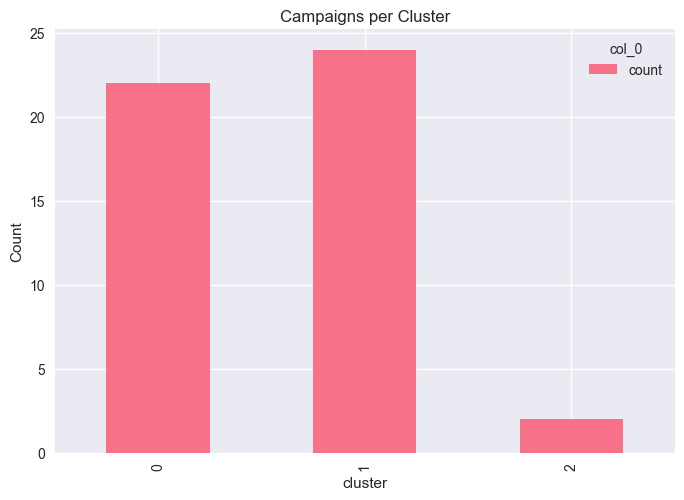

In [105]:
# Bar plot of clusters
pd.crosstab(campaign_metrics['cluster'], 'count').plot(kind='bar')
plt.title('Campaigns per Cluster')
plt.ylabel('Count')
plt.show()

21:49:37 - cmdstanpy - INFO - Chain [1] start processing
21:49:38 - cmdstanpy - INFO - Chain [1] done processing


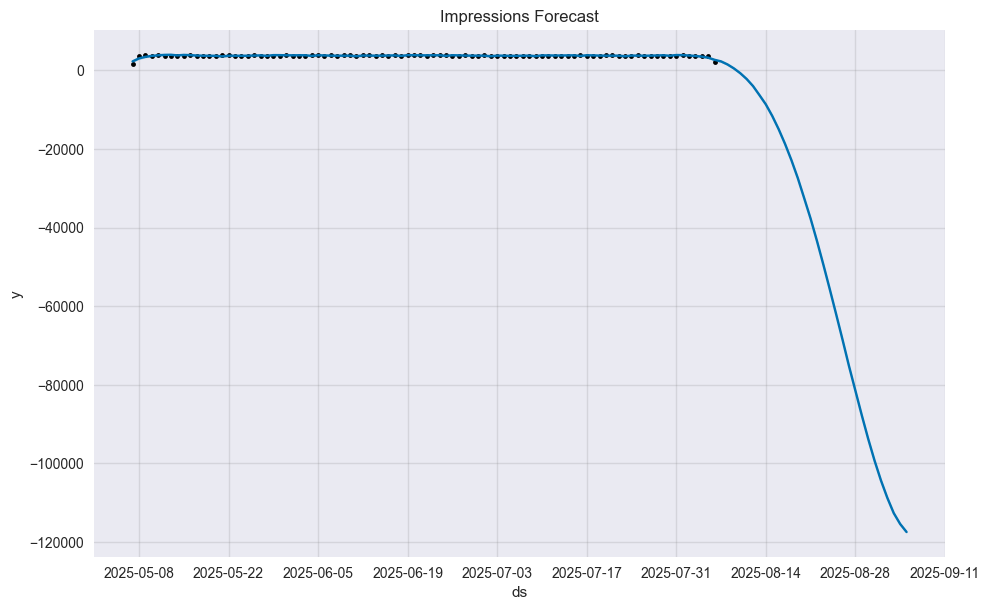

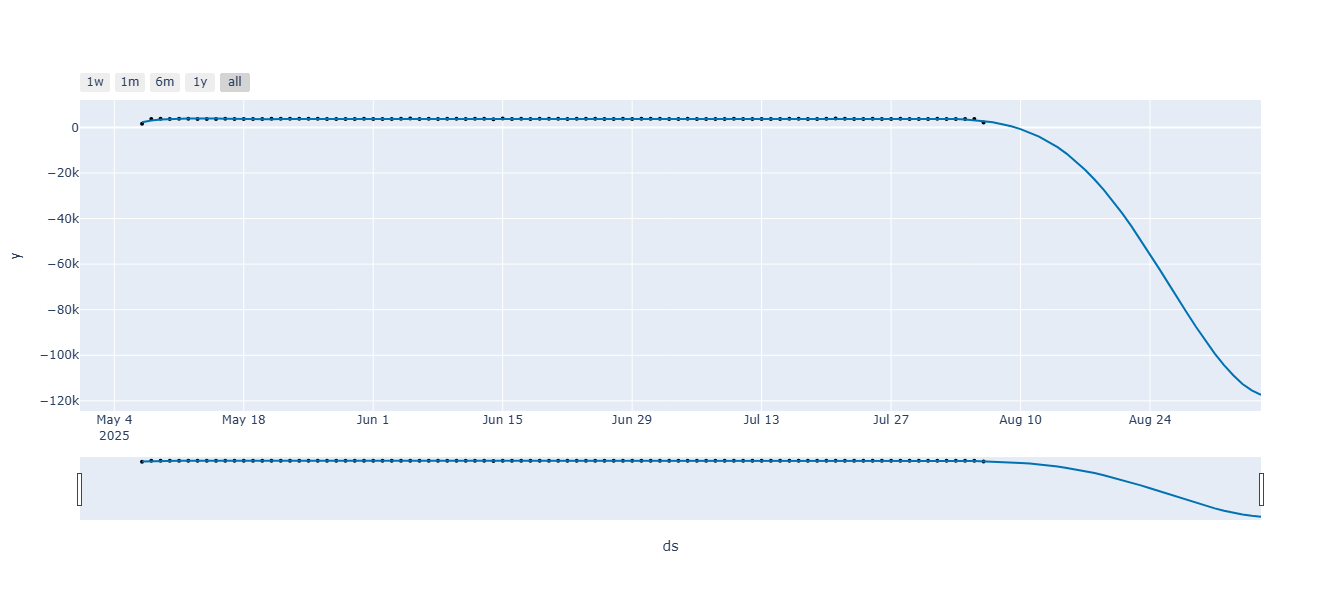

In [106]:
from prophet import Prophet
from prophet.plot import plot_plotly  # For interactive

# Daily impressions
daily_impressions = full_df[full_df['event_type'] == 'Impression'].groupby('date').size().reset_index(name='impressions')
daily_impressions['date'] = pd.to_datetime(daily_impressions['date'])
daily_impressions = daily_impressions.rename(columns={'date': 'ds', 'impressions': 'y'})

# Fit Prophet
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(daily_impressions)

# Forecast 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# Plot
fig = m.plot(forecast)
plt.title('Impressions Forecast')
plt.show()

# Interactive Plotly version
fig2 = plot_plotly(m, forecast)
fig2.show()

In [108]:
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'])
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'])

campaigns_df['duration_days'] = (
    campaigns_df['end_date'] - campaigns_df['start_date']
).dt.days


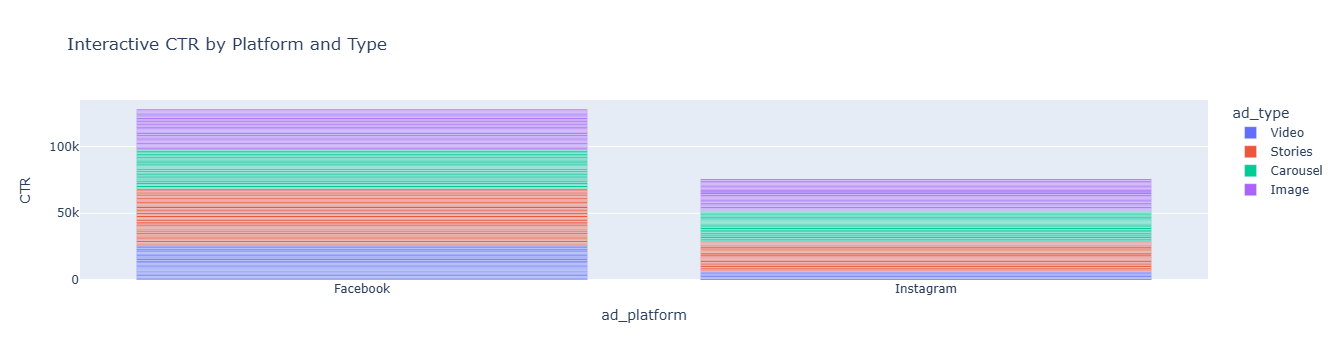

In [109]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# CTR by Platform (interactive)
fig1 = px.bar(metrics_df, x='ad_platform', y='CTR', color='ad_type',
              title='Interactive CTR by Platform and Type',
              hover_data=['Impressions', 'Purchases'])
fig1.show()

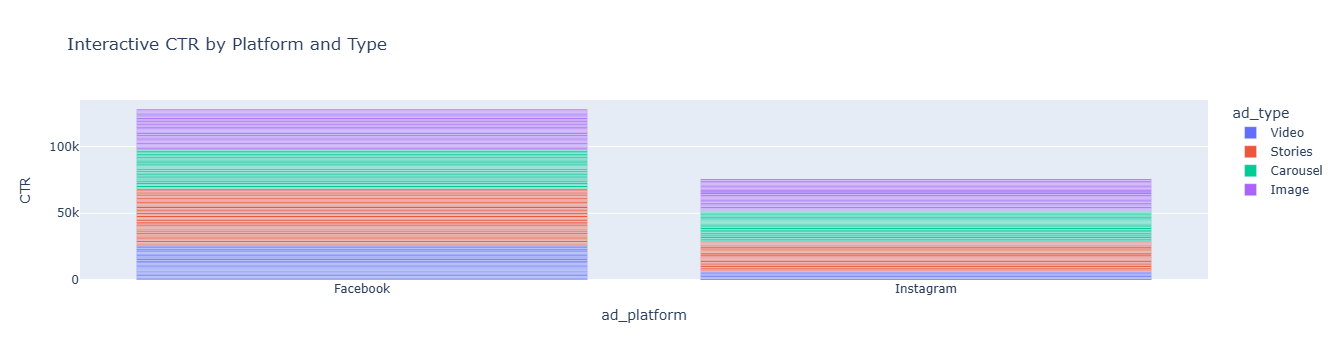

In [110]:
# CTR by Platform (interactive)
fig1 = px.bar(metrics_df, x='ad_platform', y='CTR', color='ad_type',
              title='Interactive CTR by Platform and Type',
              hover_data=['Impressions', 'Purchases'])
fig1.show()

In [113]:
# Simulate A/B: Compare Video vs. Image ads (assume random assignment)
ab_data = metrics_df[metrics_df['ad_type'].isin(['Video', 'Image'])].copy()
ab_data['variant'] = ab_data['ad_type']  # A: Video, B: Image

# T-test for CTR difference
from scipy.stats import ttest_ind
video_ctr = ab_data[ab_data['variant'] == 'Video']['CTR']
image_ctr = ab_data[ab_data['variant'] == 'Image']['CTR']
t_stat, p_val = ttest_ind(video_ctr, image_ctr)
print(f"T-test: t={t_stat:.4f}, p-value={p_val:.4f}")
if p_val < 0.05:
    print("Significant difference: Video outperforms Image.")
else:
    print("No significant difference.")

T-test: t=-1.1712, p-value=0.2449
No significant difference.


In [114]:
import joblib
joblib.dump(model, 'purchase_model.pkl')
user_agg.to_csv('user_segments.csv', index=False)
print("Advanced outputs saved!")

Advanced outputs saved!
